In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#pip install tensorflow opencv-python matplotlib opendatasets scikit-learn


In [3]:
# 1. Download Dataset
print("Downloading dataset...")
# od.download("https://www.kaggle.com/datasets/jangedoo/utkface-new")
data_dir = "./UTKFace"

In [4]:
# 2. Load and preprocess images
print("Loading and preprocessing images...")
X, y = [], []
for file in os.listdir(data_dir):
    try:
        gender = int(file.split('_')[1])  # 0 = boy, 1 = girl
        img_path = os.path.join(data_dir, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64, 64))
        X.append(img)
        y.append(gender)
    except:
        continue

X = np.array(X, dtype="float32") / 255.0
y = to_categorical(y, 2)

Loading and preprocessing images...


In [5]:
# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# 4. Build CNN model
print("Building model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Building model...


C:\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 5. Train model
print("Training model...")
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Training model...
Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step - accuracy: 0.7212 - loss: 0.5296 - val_accuracy: 0.8644 - val_loss: 0.3094
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - accuracy: 0.8663 - loss: 0.3071 - val_accuracy: 0.8876 - val_loss: 0.2664
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - accuracy: 0.8869 - loss: 0.2629 - val_accuracy: 0.8722 - val_loss: 0.2813
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 152ms/step - accuracy: 0.8978 - loss: 0.2472 - val_accuracy: 0.8958 - val_loss: 0.2432
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - accuracy: 0.9028 - loss: 0.2282 - val_accuracy: 0.8977 - val_loss: 0.2467
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 44s 148ms/step - accuracy: 0.9094 - loss: 0.2112 - val_accuracy: 0.8962 - val_loss: 0.2454
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 153ms/step - accuracy: 0.9150 - loss: 0.1963 - val_accuracy: 0.9011 - val_loss: 0.2542
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 151ms/step - accuracy

In [8]:
# 6. Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8970 - loss: 0.2895

Test Accuracy: 90.05%


In [9]:
# Save the model
model.save("gender_classifier_model.h5")
print("Model saved as gender_classifier_model.h5")

#load model
# from tensorflow.keras.models import load_model
# model = load_model("gender_classifier_model.h5")
# print("Model loaded successfully!")


Model saved as gender_classifier_model.h5


Showing predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


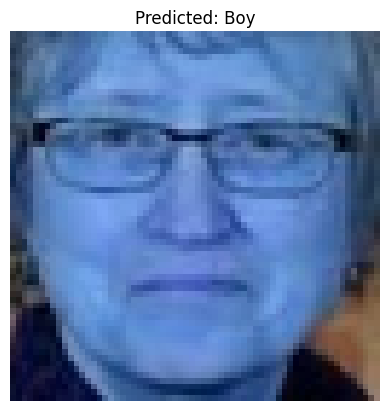

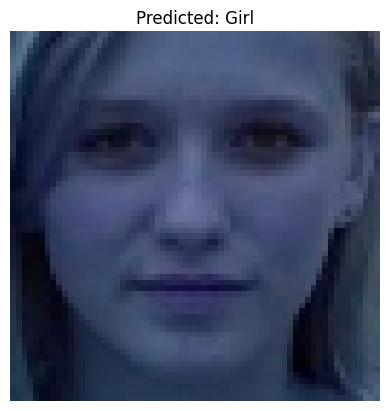

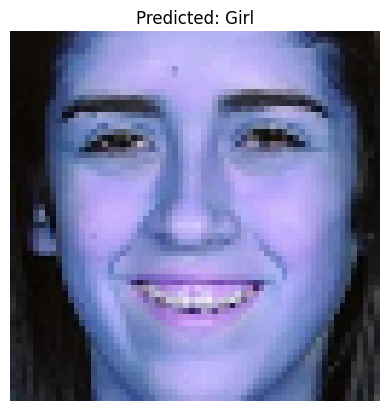

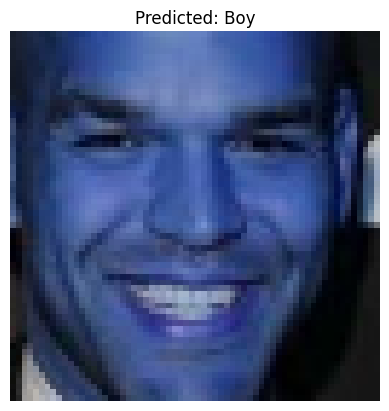

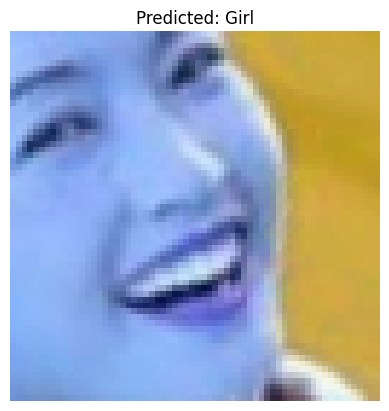

In [10]:
# 7. Show predictions
print("Showing predictions...")
preds = model.predict(X_test[:5])
for i, pred in enumerate(preds):
    label = "Boy" if np.argmax(pred) == 0 else "Girl"
    plt.imshow(X_test[i])
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

In [17]:
load_01 = "./UTKTest/1_0_0_20161219140623097.chip"
img = cv2.imread(load_01)
img = cv2.resize(img, (64, 64))
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)  # Add batch dimension

pred = model.predict(img)
label = "Boy" if np.argmax(pred) == 0 else "Girl"
print("Prediction:", label)
import cv2
import matplotlib.pyplot as plt

# Load image using OpenCV (BGR format)
# Convert BGR to RGB for correct color display
img_rgb = cv2.cvtColor(cv2.imread(load_01), cv2.COLOR_BGR2RGB)

# Display the image
# plt.imshow(img_rgb)
# plt.axis('off')  # Hide axis ticks
# plt.title("Loaded Image")
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction: Girl


149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


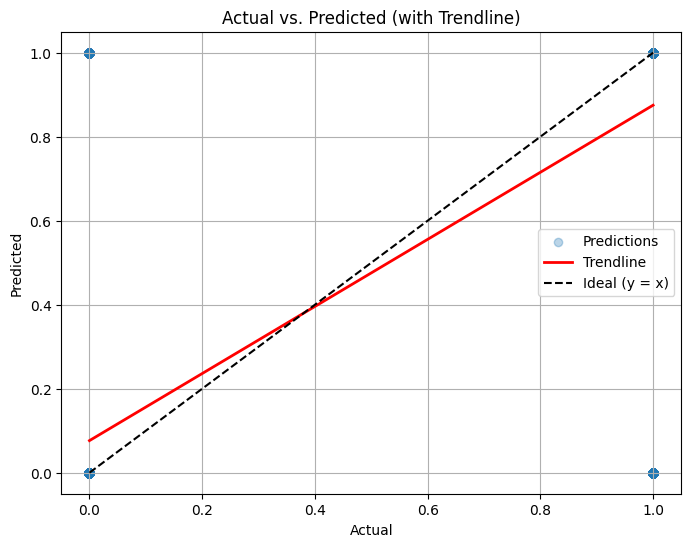

In [18]:
from sklearn.linear_model import LinearRegression

# Get true and predicted values
y_true = y_test.argmax(axis=1) if y_test.ndim == 2 else y_test
y_pred_labels = model.predict(X_test).argmax(axis=1)

# Plot scatter chart
plt.figure(figsize=(8,6))
plt.scatter(y_true, y_pred_labels, alpha=0.3, label="Predictions")

# Fit trendline
reg = LinearRegression().fit(y_true.reshape(-1, 1), y_pred_labels)
x_vals = np.linspace(0, 1, 100).reshape(-1, 1)
y_vals = reg.predict(x_vals)

plt.plot(x_vals, y_vals, color='red', linewidth=2, label="Trendline")
plt.plot([0, 1], [0, 1], 'k--', label="Ideal (y = x)")  # reference line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted (with Trendline)")
plt.legend()
plt.grid(True)
plt.show()